## CSC4815 Machine Learning
Homework 3 due on 3/23 at midnight

__Noah Foilb__

Rules:
- All the problems must be solved programmatically. No manual solution will be accepted. Do not hard-code constants unless they are given as parts of a problem.
- Solve each problem only in the given cell and show the final result. Do not leave debugging information.  __Do not add cells__.
- You may not import any external modules other than numpy, pandas, sklearn, and matplotlib. Take advantage of the code examples accompanying each sklearn API on their website.
- Always try to make the output informative and intuitive. That's what your client will care about in the end. Add description/label to the output values.
- <font color='red'>A solution ending with a syntax or runtime error will get zero points no matter how much you worked on it. It will be much better to submit an error-free, partial solution than a solution which never runs.</font>

Execute the following cell to ensure you are using Python 3 or above.

In [1]:
!python --version

Python 3.8.3


In [2]:
import time
start_time = time.time()

In [3]:
# Preamble: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add sklearn import statements here
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Problem 1

You will have a hands-on experience on Support Vector Machines with various kernels in this problem. Solve this problem in the following sequence of steps:

1. Load data: (1 point) Load the accompanying dataset. Examine its schema, shape, column statistics, class label distribution, and missing value count (not by reading schema information manually). The _Class_ attribute holds the class labels.
(<font color='green'>*Understand the dataset before you move on to the next step.*</font>)
2. Prepare data: (2 points) Prepare dataset for training. The index feature must be dropped (<font color='green'>*Think about why this column must be dropped*</font>). Class labels must not be string constants. (Hence, you need to encode them as numbers.) Use the 70% hold-out method for train and testset separation using the **stratified split** method. Show the shapes of the training and testing sets. Show also the first and last five class labels in the training set.
3. Train a classifier: (1 point) Train the classifier (*specified below the instruction for Step 5*) using default parameters with an exception of **random_state**. Set the **random_state** parameter to 1 for each classifier.
4. Test the trained classifier: (2 points) Test the trained classifier  in Step 3. Show confusion matrix, accuracy, precision, recall, and f-1 score. Show up to 5 decimal digits.
5. Plot precision and recall: (1 point) Draw the precision-recall curve for the tested classifier in Step 4. Use the **plot_precision_recall_curve** function of sklearn for this task.

Repeat Steps 3, 4 and 5 for each of these classifiers in the given order: Logistic Regression, SGD Classifier, Support Vector Classifier with linear, polynomial, RBF and Sigmoid kernels. (Hence, six classification models are in total.) All of these are implemented in the sklearn library.

Each step, classifier, metric, and any information displayed from your solution must be properly labeled.

<font color='green'>*Once the problem is solved, take time to review the result from each classifier.*</font>

In [4]:
# Your Step 1 solution goes in this cell. 
df = pd.read_csv("Rice-Gonen+Jasmine.csv",delimiter=',')         # Read_csv to get data into python and delimiter to create dataframe
                                              # Missing Value Count
print("The Schema of the data is:","\n",df.head(5),"\n","\n"
      "The Shape of the data is: ", df.shape,"\n","\n",
      "The Column Statistics look like:", "\n", df.describe(),"\n","\n"
      "The classes consist of:", df['Class'].unique(),"\n","\n"
      "The number of missing values in each column:","\n", df.isna().sum())

The Schema of the data is: 
    id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229317        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation    Class  
0      76.004525  0.657536    273.085   0.764510      1.440796  jasmine  
1      60.471018  0.713009    208.317   0.831658      1.453137  jasmine  
2      62.296341  0.759153    210.012   0.868434      1.465950  jasmine  
3      62.551300  0.783529    210.657   0.870203      1.483456  jasmine  
4      68.571668  0.769375    230.332   0.874743      1.510000  jasmine   
 
The Shape of the data is:  (18185, 12) 
 
 The Column Statistics look lik

In [5]:
# Your Step 2 solution goes in this cell.
# First lets deal with the class labels by making them constants
df['Class'] = df['Class'].replace(['jasmine'],0)                  # Jasmines will be 0 
df['Class'] = df['Class'].replace(['Gonen'],1)                    # Gonen will be 1 

# Now lets get rid of the id column
df.drop(['id'],axis = 1, inplace = True)                          # Drop Id

# Time to get the training dataset and testing dataset
df_train, df_test = train_test_split(df, train_size = .7, random_state=1)

# Display results
print("The shape of the Testing dataset is:", df_test.shape,"\n" +
      "The shape of the Training dataset is:", df_train.shape,"\n" +
      "The first five class labels in the Training dataset is:","\n", 
      df_train['Class'].head(5),"\n" + 
      "The last five class labels in the Training dataset is:","\n",
      df_train['Class'].tail(5))

The shape of the Testing dataset is: (5456, 11) 
The shape of the Training dataset is: (12729, 11) 
The first five class labels in the Training dataset is: 
 1907     0
17323    1
13533    1
15957    1
7463     0
Name: Class, dtype: int64 
The last five class labels in the Training dataset is: 
 10955    0
17289    1
5192     0
12172    1
235      0
Name: Class, dtype: int64


C:\Users\nofoi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For each Classification Method I will show the Confusion Matrix, Accuracy, Precision, Recall, and f-1 score. 

 	 Logistic Regression 
 Confusion Matrix: 
 [[2961   27]
 [  35 2433]] 
 Accuracy: 0.98864 
 Precision: 0.99096 
 Recall: 0.98832 
 f-1 score: 0.98964 

 	 SGD Classifier 
 Confusion Matrix: 
 [[2963   25]
 [  71 2397]] 
 Accuracy: 0.9824 
 Precision: 0.99163 
 Recall: 0.9766 
 f-1 score: 0.98406 

 	 Linear Support Vector Classifier 
 Confusion Matrix: 
 [[2962   26]
 [  35 2433]] 
 Accuracy: 0.98882 
 Precision: 0.9913 
 Recall: 0.98832 
 f-1 score: 0.98981 

 	 Polynomial Support Vector Classifier 
 Confusion Matrix: 
 [[2931   57]
 [ 324 2144]] 
 Accuracy: 0.93017 
 Precision: 0.98092 
 Recall: 0.90046 
 f-1 score: 0.93897 

 	 RBF Support Vector Classifier 
 Confusion Matrix: 
 [[2936   52]
 [ 338 2130]] 
 Accuracy: 0.92852 
 Precision: 0.9826 
 Recall: 0.89676 
 f-1 score: 0.93772 

 	 Sigmoid Support Vector Classifier 
 Confusion Matrix: 
 [[ 649 2339]
 [2328  140]] 
 

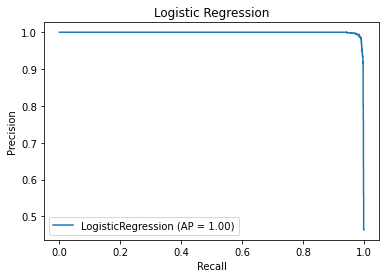

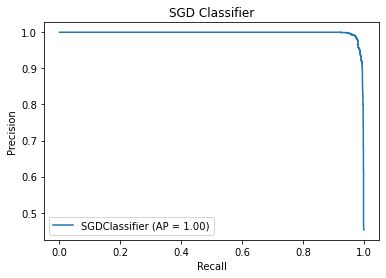

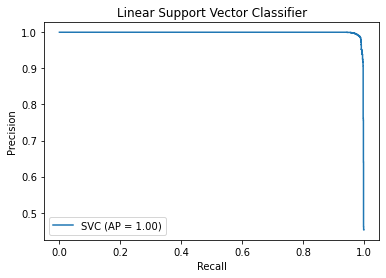

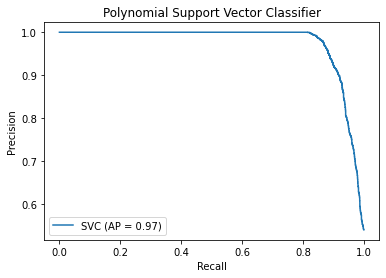

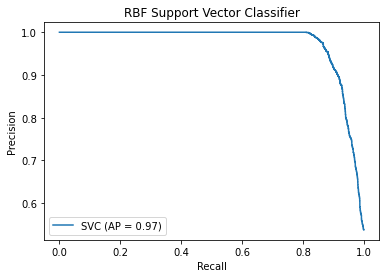

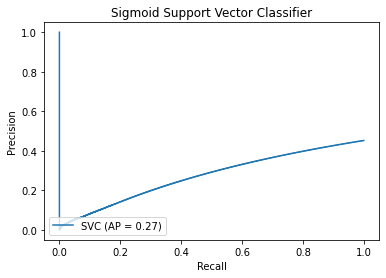

In [6]:
# Your solution for Steps 3, 4 and 5 goes in this cell.

# Assign the class to be the predicted value and the rest be the predictors
# Do this for both training data and testing data
X = df_train.loc[:,df_train.columns != 'Class']
Y = df_train['Class']
X_new = df_test.loc[:,df_test.columns != 'Class']
Y_new = df_test['Class']


# LOGISTIC REGRESSION 
log_reg = LogisticRegression(random_state=1)                                   # Lets train/fit our data
log_reg.fit(X,Y)

y_pred_log = log_reg.predict(X_new)                                            # Test our Training data


cm_log = confusion_matrix(Y_new, y_pred_log)                                   # Confusion matrix

Acc_log = log_reg.score(X_new, Y_new)                                          # Find the accuracy of the model.    # or   accuracy_score = np.mean(y_pred_log == Y_new)

Pre_log = cm_log[0,0]/(cm_log[0,0]+cm_log[0,1])                                # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_log = cm_log[0,0]/(cm_log[0,0] + cm_log[1,0])                              # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_log = 2*((Pre_log*Rec_log)/(Pre_log+Rec_log))                            # Find F1
 
disp = plot_precision_recall_curve(log_reg,X_new,Y_new)                        # Display Precision Recall Curve.
disp.ax_.set_title('Logistic Regression')


# SGD CLASSIFIER 
sgd_reg = SGDClassifier(random_state=1)                                        # Lets train/fit our data
sgd_reg.fit(X,Y.ravel())

y_pred_sgd = sgd_reg.predict(X_new)                                            # Test our Training data

cm_sgd = confusion_matrix(Y_new, y_pred_sgd)                                   # Confusion matrix

Acc_sgd = sgd_reg.score(X_new, Y_new)                                          # Find the accuracy of the model

Pre_sgd = cm_sgd[0,0]/(cm_sgd[0,0]+cm_sgd[0,1])                                # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_sgd = cm_sgd[0,0]/(cm_sgd[0,0] + cm_sgd[1,0])                              # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_sgd = 2*((Pre_sgd*Rec_sgd)/(Pre_sgd+Rec_sgd))                            # Find F1

disp = plot_precision_recall_curve(sgd_reg,X_new,Y_new)                               # Display Precision Recall Curve.
disp.ax_.set_title('SGD Classifier')


# Support Vector Classification LINEAR
svm_clf = SVC(kernel="linear",random_state = 1)
svm_clf.fit(X, Y)

y_pred_svm = svm_clf.predict(X_new)                                            # Test our Training data

cm_svm = confusion_matrix(Y_new, y_pred_svm)                                   # Confusion matrix

Acc_svm = np.mean(y_pred_svm == Y_new)                                         # Find the accuracy of the model. 

Pre_svm = cm_svm[0,0]/(cm_svm[0,0]+cm_svm[0,1])                                # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_svm = cm_svm[0,0]/(cm_svm[0,0] + cm_svm[1,0])                              # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_svm = 2*((Pre_svm*Rec_svm)/(Pre_svm+Rec_svm))                            # Find F1

disp = plot_precision_recall_curve(svm_clf,X_new,Y_new)                               # Display Precision Recall Curve.
disp = disp.ax_.set_title('Linear Support Vector Classifier')


# Support Vector Classification POLYNOMIAL
svm_clf_poly = SVC(kernel="poly",random_state = 1)
svm_clf_poly.fit(X, Y)

y_pred_svm_poly = svm_clf_poly.predict(X_new)                                  # Test our Training data

cm_svm_poly = confusion_matrix(Y_new, y_pred_svm_poly)                         # Confusion matrix

Acc_svm_poly = np.mean(y_pred_svm_poly == Y_new)                               # Find the accuracy of the model. 

Pre_svm_poly = cm_svm_poly[0,0]/(cm_svm_poly[0,0]+cm_svm_poly[0,1])            # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_svm_poly = cm_svm_poly[0,0]/(cm_svm_poly[0,0] + cm_svm_poly[1,0])          # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_svm_poly = 2*((Pre_svm_poly*Rec_svm_poly)/(Pre_svm_poly+Rec_svm_poly))   # Find F1

disp = plot_precision_recall_curve(svm_clf_poly,X_new,Y_new)                          # Display Precision Recall Curve.
disp.ax_.set_title('Polynomial Support Vector Classifier')


# Support Vector Classification RBF
svm_clf_RBF = SVC(kernel="rbf",random_state = 1)
svm_clf_RBF.fit(X, Y)

y_pred_svm_RBF = svm_clf_RBF.predict(X_new)                                    # Test our Training data

cm_svm_RBF = confusion_matrix(Y_new, y_pred_svm_RBF)                           # Confusion matrix

Acc_svm_RBF = np.mean(y_pred_svm_RBF == Y_new)                                 # Find the accuracy of the model. 

Pre_svm_RBF = cm_svm_RBF[0,0]/(cm_svm_RBF[0,0]+cm_svm_RBF[0,1])                # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_svm_RBF = cm_svm_RBF[0,0]/(cm_svm_RBF[0,0] + cm_svm_RBF[1,0])              # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_svm_RBF = 2*((Pre_svm_RBF*Rec_svm_RBF)/(Pre_svm_RBF+Rec_svm_RBF))        # Find F1

disp = plot_precision_recall_curve(svm_clf_RBF,X_new,Y_new)                           # Display Precision Recall Curve
disp.ax_.set_title('RBF Support Vector Classifier')


# Support Vector Classification SIGMOID
svm_clf_sigmoid = SVC(kernel="sigmoid",random_state = 1)
svm_clf_sigmoid.fit(X, Y)

y_pred_svm_sigmoid = svm_clf_sigmoid.predict(X_new)                            # Test our Training data

cm_svm_sigmoid = confusion_matrix(Y_new, y_pred_svm_sigmoid)                   # Confusion matrix

Acc_svm_sigmoid = np.mean(y_pred_svm_sigmoid == Y_new)                         # Find the accuracy of the model. 

Pre_svm_sigmoid = cm_svm_sigmoid[0,0]/(cm_svm_sigmoid[0,0]+cm_svm_sigmoid[0,1])              # Find Precision # This is equal to Tp/(Tp + Fp)

Rec_svm_sigmoid = cm_svm_sigmoid[0,0]/(cm_svm_sigmoid[0,0] + cm_svm_sigmoid[1,0])            # Find Recall  # This is equal to Tp/(Tp + fn)

F_one_svm_sigmoid = 2*((Pre_svm_sigmoid*Rec_svm_sigmoid)/(Pre_svm_sigmoid+Rec_svm_sigmoid))  # Find F1

disp = plot_precision_recall_curve(svm_clf_sigmoid,X_new,Y_new)                                     # Display Precision Recall Curve
disp.ax_.set_title('Sigmoid Support Vector Classifier')


# Display results
# Show confusion matrix, accuracy, precision, recall, and f-1 score. Show up to 5 decimal digits
print("For each Classification Method I will show the Confusion Matrix, Accuracy, Precision, Recall, and f-1 score.","\n"*2,
     "\t","Logistic Regression","\n",
     "Confusion Matrix:","\n",cm_log,"\n",
     "Accuracy:",Acc_log.round(5),"\n",
     "Precision:",Pre_log.round(5),"\n",
     "Recall:",Rec_log.round(5),"\n",
     "f-1 score:", F_one_log.round(5),"\n"*2,
     "\t","SGD Classifier","\n",
     "Confusion Matrix:","\n",cm_sgd,"\n",
     "Accuracy:",Acc_sgd.round(5),"\n",
     "Precision:",Pre_sgd.round(5),"\n",
     "Recall:",Rec_sgd.round(5),"\n",
     "f-1 score:", F_one_sgd.round(5),"\n"*2,
     "\t","Linear Support Vector Classifier","\n",
     "Confusion Matrix:","\n",cm_svm,"\n",
     "Accuracy:",Acc_svm.round(5),"\n",
     "Precision:",Pre_svm.round(5),"\n",
     "Recall:",Rec_svm.round(5),"\n",
     "f-1 score:", F_one_svm.round(5),"\n"*2,
     "\t","Polynomial Support Vector Classifier","\n",
     "Confusion Matrix:","\n",cm_svm_poly,"\n",
     "Accuracy:",Acc_svm_poly.round(5),"\n",
     "Precision:",Pre_svm_poly.round(5),"\n",
     "Recall:",Rec_svm_poly.round(5),"\n",
     "f-1 score:", F_one_svm_poly.round(5),"\n"*2,
     "\t","RBF Support Vector Classifier","\n",
     "Confusion Matrix:","\n",cm_svm_RBF,"\n",
     "Accuracy:",Acc_svm_RBF.round(5),"\n",
     "Precision:",Pre_svm_RBF.round(5),"\n",
     "Recall:",Rec_svm_RBF.round(5),"\n",
     "f-1 score:", F_one_svm_RBF.round(5),"\n"*2,
     "\t","Sigmoid Support Vector Classifier","\n",
     "Confusion Matrix:","\n",cm_svm_sigmoid,"\n",
     "Accuracy:",Acc_svm_sigmoid.round(5),"\n",
     "Precision:",Pre_svm_sigmoid.round(5),"\n",
     "Recall:",Rec_svm_sigmoid.round(5),"\n",
     "f-1 score:", F_one_svm_sigmoid.round(5),"\n"*2,)

# Support Vector Classification LINEAR

# Problem 2

(1 point) From Problem 1, you should have noticed that SVC with the Sigmoid kernel performs poorly. Improve the classifier to an accuracy higher than 90% by either performing data processing before training or assigning different parameters to the classifier. State clearly your method of accuracy enhancement.

Only the solutions which successfully imporve the accuracy above 90% will get 1 point. Otherwise, no partial points will be given for this problem. So, leave the cell empty if you are unable to find a solution.

When you are able to improve accuracy successfully, draw a plot precision-recall curve again. You will see a significant change in the shape of the curve.

In [7]:
# Your solution goes in this cell.
# My idea was to try to normalize the training data but I do not have enough time to complete this step. 

# Problem 3

(2 points) Using the original dataset and the selected classifiers with default parameters (with an exception of **random_state=1**), perform 3-fold cross validation and report the results (programmatically, of course).

In [8]:
# Your solution goes in this cell.
# LOGISTIC REGRESSION 
Cross_log = cross_val_score(log_reg,X,Y, cv=3)

# SGD CLASSIFIER 
Cross_SGD = cross_val_score(sgd_reg,X,Y, cv=3)

# Support Vector Classification LINEAR
Cross_svm = cross_val_score(svm_clf,X,Y, cv=3)

# Support Vector Classification POLYNOMIAL
Cross_poly = cross_val_score(svm_clf_poly,X,Y, cv=3)

# Support Vector Classification RBF
Cross_RBF = cross_val_score(svm_clf_RBF,X,Y, cv=3)

# Support Vector Classification SIGMOID
Cross_sigmoid = cross_val_score(svm_clf_sigmoid,X,Y, cv=3)

# Display Results
print("The 3 fold cross validation for all the different type of classifiers I used are as follows:","\n",
     "Logisitic Regression:","\t"*4,Cross_log,"\n",
     "SGD Classifier:","\t"*4,Cross_SGD,"\n",
     "Linear Support Vector Classifier:","\t"*2,Cross_svm,"\n",
     "Polynomial Support Vector Classifier:","\t"*2,Cross_poly,"\n",
     "RBF Support Vector Classification:","\t"*2,Cross_RBF,"\n",
     "Sigmoid Support Vector Classification:","\t"*1,Cross_sigmoid)

The 3 fold cross validation for all the different type of classifiers I used are as follows: 
 Logisitic Regression: 				 [0.98986566 0.98656611 0.9879802 ] 
 SGD Classifier: 				 [0.85906198 0.97784586 0.96747584] 
 Linear Support Vector Classifier: 		 [0.99104407 0.9879802  0.98821588] 
 Polynomial Support Vector Classifier: 		 [0.92717417 0.92905963 0.92081075] 
 RBF Support Vector Classification: 		 [0.92552439 0.92858826 0.91892529] 
 Sigmoid Support Vector Classification: 	 [0.14989394 0.15696441 0.14305916]
